In [ ]:
import seaborn as sns
import cv2
import keras
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.optimizers import Adam
from keras.models import Sequential
from sklearn.metrics import classification_report,confusion_matrix
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
categories = os.listdir('/content/drive/MyDrive/food20dataset/train_set')
img_size= 224
def get_data(data_dir):
    data=[]
    for category in categories:
        path= os.path.join(data_dir,category)
        class_num= categories.index(category)
        print(path)
        for img in os.listdir(path):
            try:
                img_arr= cv2.imread(os.path.join(path,img))
                resized_arr= cv2.resize(img_arr,(img_size,img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
train = get_data('/content/drive/MyDrive/food20dataset/train_set')  
val = get_data('/content/drive/MyDrive/food20dataset/test_set')

/content/drive/MyDrive/food20dataset/train_set/tandoori chicken
/content/drive/MyDrive/food20dataset/train_set/poori
/content/drive/MyDrive/food20dataset/train_set/upma
/content/drive/MyDrive/food20dataset/train_set/paniyaram
/content/drive/MyDrive/food20dataset/train_set/samosa
/content/drive/MyDrive/food20dataset/train_set/ven pongal
/content/drive/MyDrive/food20dataset/train_set/vada pav
/content/drive/MyDrive/food20dataset/train_set/halwa
/content/drive/MyDrive/food20dataset/train_set/noodles
/content/drive/MyDrive/food20dataset/train_set/kathi roll
/content/drive/MyDrive/food20dataset/train_set/meduvadai
/content/drive/MyDrive/food20dataset/train_set/gulab jamun
/content/drive/MyDrive/food20dataset/train_set/idly
/content/drive/MyDrive/food20dataset/train_set/dosa
/content/drive/MyDrive/food20dataset/train_set/biriyani
/content/drive/MyDrive/food20dataset/train_set/chaat
/content/drive/MyDrive/food20dataset/train_set/bisibelebath
/content/drive/MyDrive/food20dataset/train_set/butt

<ipython-input-3-f3d21cdb70e2>:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


/content/drive/MyDrive/food20dataset/test_set/tandoori chicken
/content/drive/MyDrive/food20dataset/test_set/poori
/content/drive/MyDrive/food20dataset/test_set/upma
/content/drive/MyDrive/food20dataset/test_set/paniyaram
/content/drive/MyDrive/food20dataset/test_set/samosa
/content/drive/MyDrive/food20dataset/test_set/ven pongal
/content/drive/MyDrive/food20dataset/test_set/vada pav
/content/drive/MyDrive/food20dataset/test_set/halwa
/content/drive/MyDrive/food20dataset/test_set/noodles
/content/drive/MyDrive/food20dataset/test_set/kathi roll
/content/drive/MyDrive/food20dataset/test_set/meduvadai
/content/drive/MyDrive/food20dataset/test_set/gulab jamun
/content/drive/MyDrive/food20dataset/test_set/idly
/content/drive/MyDrive/food20dataset/test_set/dosa
/content/drive/MyDrive/food20dataset/test_set/biriyani
/content/drive/MyDrive/food20dataset/test_set/chaat
/content/drive/MyDrive/food20dataset/test_set/bisibelebath
/content/drive/MyDrive/food20dataset/test_set/butternaan
/content/dr

In [ ]:
x_train = []
y_train = []
x_val = []
y_val = []

In [ ]:
for feature, label in train:
    x_train.append(feature)
    y_train.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)
    
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size,img_size,1)
y_train = np.array(y_train)

x_val.reshape(-1,img_size,img_size,1)
y_val = np.array(y_val)

In [ ]:
!pip install visualkeras
import visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.0/992.0 KB 50.9 MB/s eta 0:00:00


In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape = (224,224,3), include_top=False, weights='imagenet')
base_model.trainable=False
model = tf.keras.Sequential([base_model, tf.keras.layers.GlobalAveragePooling2D(), tf.keras.layers.Dropout(0.2), tf.keras.layers.Dense(512,activation='relu'),tf.keras.layers.Dense(20,activation='softmax')])
model.summary()

9406464/9406464 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 dense_1 (Dense)             (None, 20)                10260     
                                                           

In [ ]:
base_learning_rate = 0.1
model.compile(optimizer = tf.keras.optimizers.Adam(lr=base_learning_rate), loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history1 = model.fit(x_train,y_train,epochs = 15, validation_data=(x_val,y_val))

Epoch 1/15


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


45/45 [==============================] - 21s 188ms/step - loss: 1.7818 - accuracy: 0.4716 - val_loss: 0.8903 - val_accuracy: 0.7400
Epoch 2/15
45/45 [==============================] - 3s 71ms/step - loss: 0.6916 - accuracy: 0.7979 - val_loss: 0.7577 - val_accuracy: 0.7683
Epoch 3/15
45/45 [==============================] - 3s 71ms/step - loss: 0.3983 - accuracy: 0.8801 - val_loss: 0.6421 - val_accuracy: 0.8067
Epoch 4/15
45/45 [==============================] - 3s 73ms/step - loss: 0.2421 - accuracy: 0.9362 - val_loss: 0.7024 - val_accuracy: 0.8017
Epoch 5/15
45/45 [==============================] - 3s 73ms/step - loss: 0.1498 - accuracy: 0.9645 - val_loss: 0.6895 - val_accuracy: 0.7983
Epoch 6/15
45/45 [==============================] - 3s 72ms/step - loss: 0.1336 - accuracy: 0.9645 - val_loss: 0.6994 - val_accuracy: 0.8050
Epoch 7/15
45/45 [==============================] - 3s 65ms/step - loss: 0.1042 - accuracy: 0.9723 - val_loss: 0.6449 - val_accuracy: 0.8250
Epoch 8/15
45/45 [====

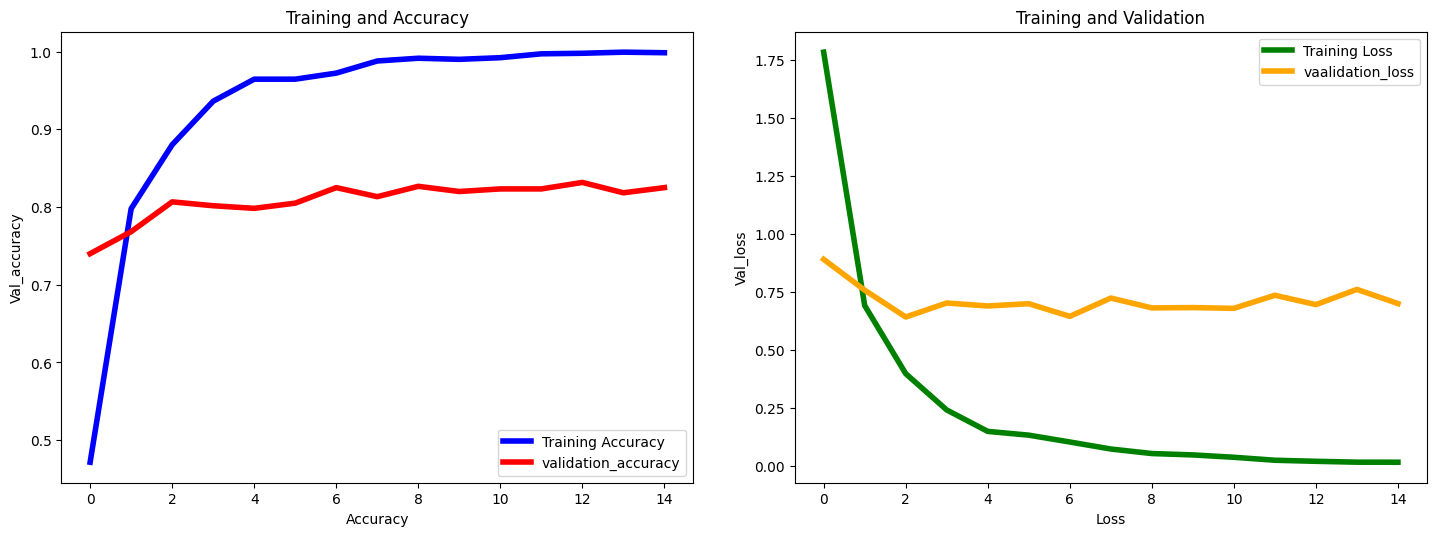

In [ ]:
epochs_range = range(15)
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
ax1.plot(epochs_range,acc,label='Training Accuracy',c='blue',linewidth = 4)
ax1.plot(epochs_range,val_acc, label='validation_accuracy',c='red',linewidth=4)
ax1.legend()
ax1.set_title('Training and Accuracy')
ax1.set_xlabel('Accuracy', fontsize=10)
ax1.set_ylabel('Val_accuracy', fontsize=10)
ax2.plot(epochs_range,loss,label='Training Loss',c='green',linewidth = 4)
ax2.plot(epochs_range,val_loss, label='vaalidation_loss',c='orange',linewidth=4)
ax2.legend()
ax2.set_title('Training and Validation')
ax2.set_xlabel('Loss', fontsize=10)
ax2.set_ylabel('Val_loss', fontsize=10)
fig.tight_layout(pad=3.0)
plt.show()

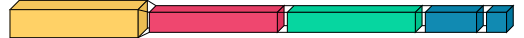

In [ ]:
visualkeras.layered_view(model)

In [ ]:
from keras.applications import VGG19

base_model= VGG19(include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3),
    pooling=None)
base_model.trainable= False

model= Sequential()
model.add(base_model)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dense(20,activation='softmax'))
model.summary()

80134624/80134624 [==============================] - 4s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 global_average_pooling2d_1   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 20)                10260     
                                                                 
Total params: 20,297,300
Trainable params: 272,916
Non-

In [ ]:
model.compile(Adam(lr=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history2 = model.fit(x_train,y_train,epochs = 15 , validation_data = (x_val, y_val))

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/15
45/45 [==============================] - 24s 429ms/step - loss: 2.7840 - accuracy: 0.1681 - val_loss: 2.3732 - val_accuracy: 0.3433
Epoch 2/15
45/45 [==============================] - 10s 233ms/step - loss: 2.1746 - accuracy: 0.3525 - val_loss: 1.9238 - val_accuracy: 0.4450
Epoch 3/15
45/45 [==============================] - 11s 240ms/step - loss: 1.7842 - accuracy: 0.4539 - val_loss: 1.5579 - val_accuracy: 0.5750
Epoch 4/15
45/45 [==============================] - 11s 236ms/step - loss: 1.5132 - accuracy: 0.5638 - val_loss: 1.4155 - val_accuracy: 0.5967
Epoch 5/15
45/45 [==============================] - 12s 279ms/step - loss: 1.3604 - accuracy: 0.6064 - val_loss: 1.2605 - val_accuracy: 0.6283
Epoch 6/15
45/45 [==============================] - 12s 277ms/step - loss: 1.2359 - accuracy: 0.6213 - val_loss: 1.2107 - val_accuracy: 0.6467
Epoch 7/15
45/45 [==============================] - 12s 273ms/step - loss: 1.1625 - accuracy: 0.6440 - val_loss: 1.0989 - val_accuracy: 0.6683

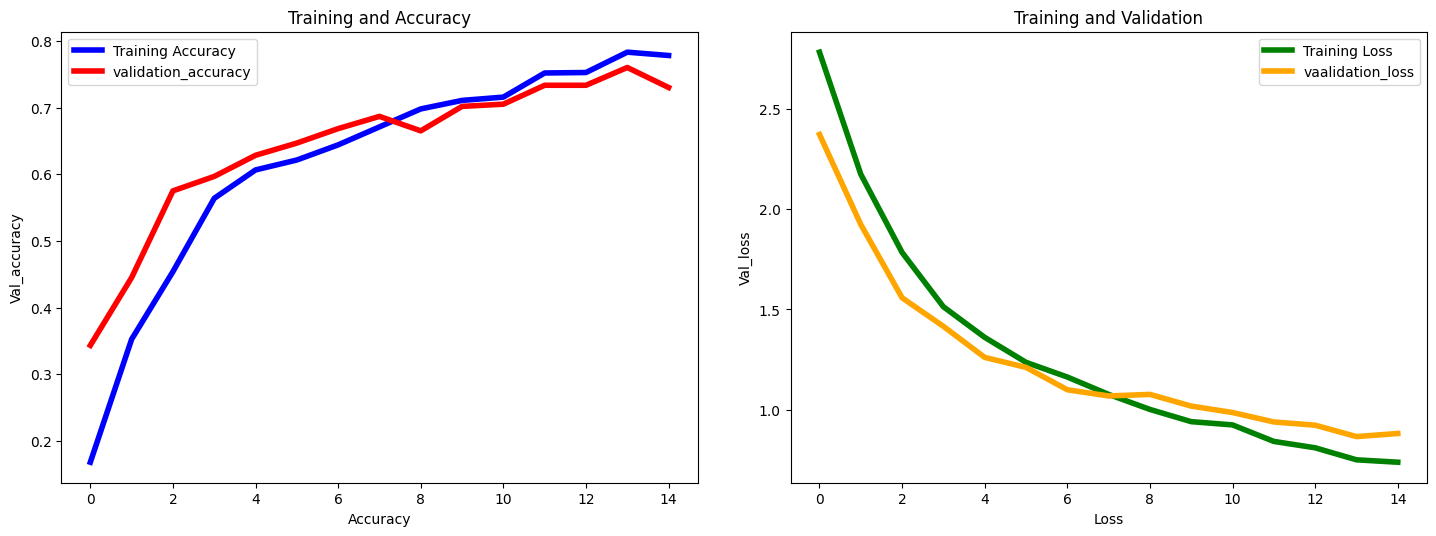

In [ ]:
epochs_range = range(15)
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
ax1.plot(epochs_range,acc,label='Training Accuracy',c='blue',linewidth = 4)
ax1.plot(epochs_range,val_acc, label='validation_accuracy',c='red',linewidth=4)
ax1.legend()
ax1.set_title('Training and Accuracy')
ax1.set_xlabel('Accuracy', fontsize=10)
ax1.set_ylabel('Val_accuracy', fontsize=10)
ax2.plot(epochs_range,loss,label='Training Loss',c='green',linewidth = 4)
ax2.plot(epochs_range,val_loss, label='vaalidation_loss',c='orange',linewidth=4)
ax2.legend()
ax2.set_title('Training and Validation')
ax2.set_xlabel('Loss', fontsize=10)
ax2.set_ylabel('Val_loss', fontsize=10)
fig.tight_layout(pad=3.0)
plt.show()

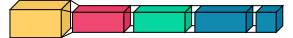

In [ ]:
visualkeras.layered_view(model)

In [ ]:
from keras.applications import InceptionResNetV2

base_model= InceptionResNetV2(include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))
base_model.trainable= False

model= Sequential()
model.add(base_model)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(Dropout(0.2))
model.add(Dense(20,activation='softmax'))
model.summary()

219055592/219055592 [==============================] - 12s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 5, 5, 1536)       54336736  
 onal)                                                           
                                                                 
 global_average_pooling2d_2   (None, 1536)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_2 (Dropout)         (None, 1536)              0         
                                                                 
 dense_4 (Dense)             (None, 20)                30740     
                                                                 
Total params: 54,367,476
Trainable params: 30,740
Non-trainable params: 54,336,736
___________________________________

In [ ]:
model.compile(Adam(lr=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history3 = model.fit(x_train,y_train,epochs = 15 , validation_data = (x_val, y_val))

Epoch 1/15
45/45 [==============================] - 31s 406ms/step - loss: 2.5665 - accuracy: 0.2745 - val_loss: 1.5752 - val_accuracy: 0.5367
Epoch 2/15
45/45 [==============================] - 13s 293ms/step - loss: 1.4545 - accuracy: 0.5844 - val_loss: 1.1783 - val_accuracy: 0.6617
Epoch 3/15
45/45 [==============================] - 11s 248ms/step - loss: 1.1397 - accuracy: 0.6567 - val_loss: 1.0181 - val_accuracy: 0.7100
Epoch 4/15
45/45 [==============================] - 13s 287ms/step - loss: 0.9740 - accuracy: 0.6986 - val_loss: 0.9683 - val_accuracy: 0.7033
Epoch 5/15
45/45 [==============================] - 11s 241ms/step - loss: 0.8369 - accuracy: 0.7362 - val_loss: 0.8308 - val_accuracy: 0.7600
Epoch 6/15
45/45 [==============================] - 11s 239ms/step - loss: 0.7352 - accuracy: 0.7851 - val_loss: 0.8406 - val_accuracy: 0.7567
Epoch 7/15
45/45 [==============================] - 13s 286ms/step - loss: 0.6860 - accuracy: 0.7780 - val_loss: 0.7751 - val_accuracy: 0.7817

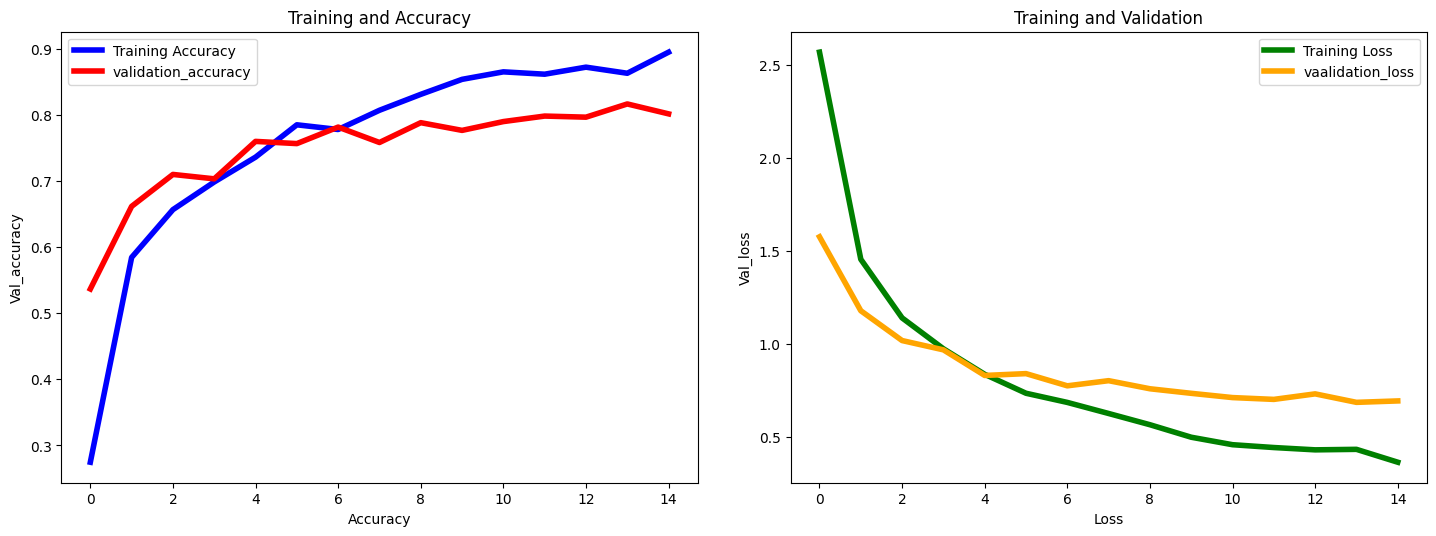

In [ ]:
epochs_range = range(15)
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
ax1.plot(epochs_range,acc,label='Training Accuracy',c='blue',linewidth = 4)
ax1.plot(epochs_range,val_acc, label='validation_accuracy',c='red',linewidth=4)
ax1.legend()
ax1.set_title('Training and Accuracy')
ax1.set_xlabel('Accuracy', fontsize=10)
ax1.set_ylabel('Val_accuracy', fontsize=10)
ax2.plot(epochs_range,loss,label='Training Loss',c='green',linewidth = 4)
ax2.plot(epochs_range,val_loss, label='vaalidation_loss',c='orange',linewidth=4)
ax2.legend()
ax2.set_title('Training and Validation')
ax2.set_xlabel('Loss', fontsize=10)
ax2.set_ylabel('Val_loss', fontsize=10)
fig.tight_layout(pad=3.0)
plt.show()

In [ ]:
visualkeras.layered_view(model)

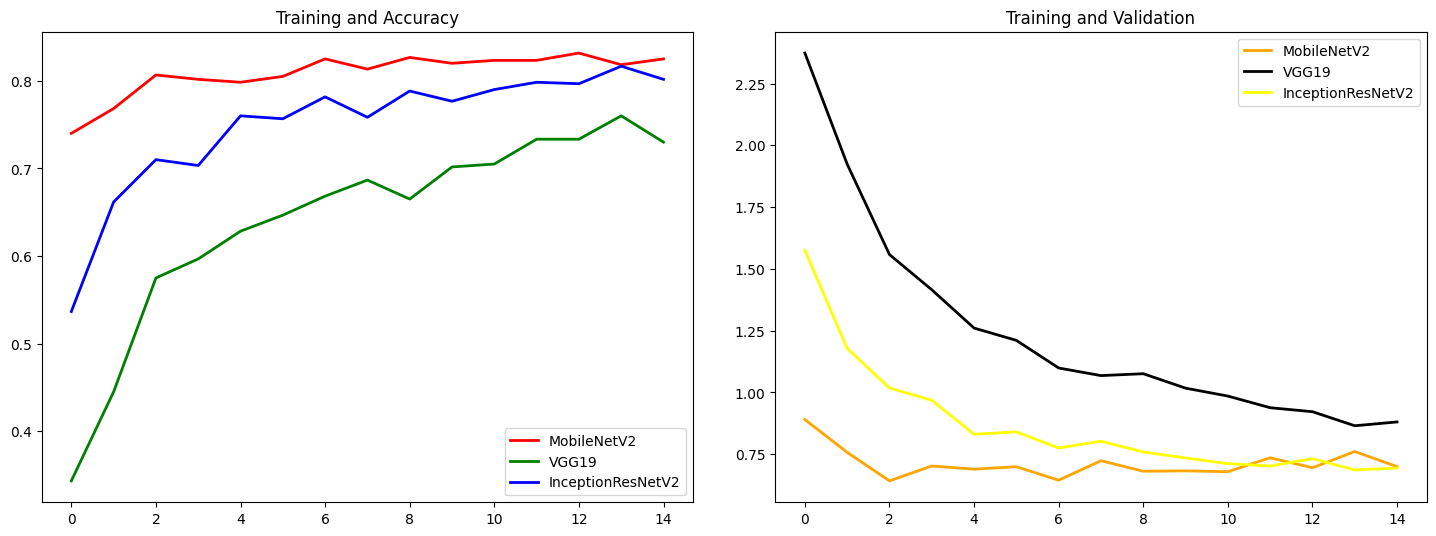

In [ ]:
# Model Comparision
epochs_range = range(15)

val_acc1 = history1.history['val_accuracy']
val_acc2 = history2.history['val_accuracy']
val_acc3 = history3.history['val_accuracy']

val_loss1 = history1.history['val_loss']
val_loss2 = history2.history['val_loss']
val_loss3 = history3.history['val_loss']

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,6))

plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)


ax1.plot(epochs_range,val_acc1, label='MobileNetV2',c='red',linewidth=2)
ax1.plot(epochs_range,val_acc2, label='VGG19',c='green',linewidth=2)
ax1.plot(epochs_range,val_acc3, label='InceptionResNetV2',c='blue',linewidth=2)
ax1.legend()

ax1.set_title('Training and Accuracy')

ax2.plot(epochs_range,val_loss1, label='MobileNetV2',c='orange',linewidth=2)
ax2.plot(epochs_range,val_loss2, label='VGG19',c='black',linewidth=2)
ax2.plot(epochs_range,val_loss3, label='InceptionResNetV2',c='yellow',linewidth=2)
ax2.legend()

ax2.set_title('Training and Validation')

fig.tight_layout(pad=3.0)
plt.show()